In [81]:
import pandas as pd 
import numpy as np
import requests 
import io
import tweepy
import time
import matplotlib.pyplot as plt
%matplotlib inline

## Gather Datasets 

In [54]:
# load the first given file from the desktop
twitter_data = pd.read_csv('/Users/sanchi/desktop/Udacity/Project_4_Twitter/twitter-archive-enhanced.csv')

In [33]:
# load the second using requests library
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
urlData = r.content
image_pred = pd.read_csv(io.StringIO(urlData.decode('utf-8')), sep="\t")                              

In [5]:
#gather data from twitter 

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
# Use given tweet ID to pull information off of twitter and set wait timer limit
tweet_id_list = image_pred['tweet_id']

start = time.time()
print("started")

df_list2 = []
for tweet_id in tweet_id_list:
    try:
        result = api.get_status(tweet_id, tweet_mode='extended')
        retweet_count = result['retweet_count']
        favorite_count = result['favorite_count']
        df_list2.append({'tweet_id': tweet_id, 'retweet_count' : retweet_count, 'favorite_count': favorite_count})
    except Exception as e:
        print (tweet_id)

end = time.time()
print(end - start)

started
680055455951884288


Rate limit reached. Sleeping for: 663


699801817392291840
754011816964026368
759566828574212096
771004394259247104
779123168116150273
802247111496568832
829374341691346946


Rate limit reached. Sleeping for: 636


831939777352105988
837012587749474308
837366284874571778
842892208864923648
844704788403113984
851953902622658560
861769973181624320
872261713294495745
873697596434513921
888202515573088257
1951.178447008133


## Assess Data

In [7]:
TweetID_df = pd.DataFrame(df_list2, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [8]:
TweetID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
tweet_id          2057 non-null int64
retweet_count     2057 non-null int64
favorite_count    2057 non-null int64
dtypes: int64(3)
memory usage: 48.3 KB


In [9]:
TweetID_df.head(15)

,tweet_id,retweet_count,favorite_count
0,666020888022790149,465,2430
1,666029285002620928,42,121
2,666033412701032449,41,113
3,666044226329800704,133,274
4,666049248165822465,41,98
5,666050758794694657,51,125
6,666051853826850816,783,1135
7,666055525042405380,223,412
8,666057090499244032,128,272
9,666058600524156928,54,106


In [10]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
TweetID_df.nunique()

tweet_id          2057
retweet_count     1567
favorite_count    1844
dtype: int64

### Cleaning Data 

#### Quality Issues:
- lot of extra columsn in twitter_dataset with null values
- timestamp column has date&time combined in it
- some donominators do not have a value of 10 in twitter_dataset
- some strings in name column do not have names or are inaccurate names
- the dog stages in the twitter dataset are broken out and can be combined under column called "dog_stage"
- dog_stages columns also have rows with several stages, probably can move move them under doggo
- image pred values are flots not percentages
- some rows in image_pred have all three predicitions are false

#### Tidiness Issues: 
- Merge all three dataframe on the tweet_id column
- Clean up the null values in the twitter dataframe 



#### Clean Quality Issues

In [16]:
#Remove some uncessary columns from 'twitter_data' to clean up dataframe (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id)

twitter_data['timestamp'] = pd.to_datetime(twitter_data['timestamp'])
twitter_dataclean = twitter_data.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [17]:
#Split up timestamp column into Dates & Time (might ease up analysis at the end)

twitter_dataclean['Date'] = pd.to_datetime(twitter_dataclean['timestamp']).dt.date
twitter_dataclean['Time'] = pd.to_datetime(twitter_dataclean['timestamp']).dt.time
twitter_dataclean = twitter_dataclean.drop('timestamp', axis=1)
twitter_dataclean.head(2)


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,Time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27


In [18]:
twitter_dataclean.groupby('rating_denominator').count()

,tweet_id,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,Date,Time
rating_denominator,,,,,,,,,,,,
0,1,1,1,0,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1
10,2333,2333,2333,2278,2333,2333,2333,2333,2333,2333,2333,2333
11,3,3,3,3,3,3,3,3,3,3,3,3
15,1,1,1,0,1,1,1,1,1,1,1,1
16,1,1,1,0,1,1,1,1,1,1,1,1
20,2,2,2,1,2,2,2,2,2,2,2,2
40,1,1,1,1,1,1,1,1,1,1,1,1


In [19]:
#remove rows where rating denominator is not 10 so that this keep a fair comparision of datapoints in the table

twitter_dataclean = twitter_dataclean [twitter_dataclean.rating_denominator == 10]
twitter_dataclean.groupby('rating_denominator').count()

,tweet_id,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,Date,Time
rating_denominator,,,,,,,,,,,,
10,2333,2333,2333,2278,2333,2333,2333,2333,2333,2333,2333,2333


In [20]:
#remove inaccurate names and label as None so we know if there is a known name or not for each row
twitter_dataclean.loc[twitter_dataclean['name'] == twitter_dataclean['name'].str.lower(), 'name'] = np.nan

In [21]:
# change the float values in the image pred table to be percentages
image_pred['p1_conf'] = image_pred['p1_conf'].astype(float).map("{:.2%}".format)
image_pred['p2_conf'] = image_pred['p2_conf'].astype(float).map("{:.2%}".format)
image_pred['p3_conf'] = image_pred['p3_conf'].astype(float).map("{:.2%}".format)

In [22]:
# clean the dog stages in the twitter dataset and combine under column called "dog_stage"

twitter_dataclean = twitter_dataclean.replace('None','', regex=True)
twitter_dataclean['dog_stage'] = twitter_dataclean['doggo'] + twitter_dataclean['floofer'] + twitter_dataclean['pupper'] + twitter_dataclean['puppo']
twitter_dataclean = twitter_dataclean.drop(['doggo','floofer','pupper','puppo'], axis=1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,Date,Time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,,2017-07-29,00:08:17,
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2017-07-28,16:27:12,
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,,2017-07-28,00:22:40,
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,2017-07-27,16:25:51,
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017-07-26,15:59:51,doggo


In [64]:
# Some rows have multiple names for dog_stages, move them under doggo (making the assumption that they are at the doggo stage)

twitter_dataclean = twitter_dataclean.replace('doggopupper','doggo', regex=True)
twitter_dataclean = twitter_dataclean.replace('doggopuppo','doggo', regex=True)
twitter_dataclean = twitter_dataclean.replace('doggofloofer','doggo', regex=True)
twitter_dataclean.dog_stage.value_counts()

           1953
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [34]:
# remove rows from Image_pred if all three predicitions are false

false_data = image_pred[(image_pred['p1_dog'] == False) & (image_pred['p2_dog'] == False)& (image_pred['p3_dog'] == False)].index

In [35]:
image_pred.drop(false_data, inplace=True)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


#### Clean Tidiness Issues

In [75]:
# Merge the twitter_dataclean & TweetID_df into one df
twitter_archive_master = twitter_dataclean.merge(TweetID_df, on='tweet_id')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2038
Data columns (total 12 columns):
tweet_id              2039 non-null int64
source                2039 non-null object
text                  2039 non-null object
expanded_urls         2039 non-null object
rating_numerator      2039 non-null int64
rating_denominator    2039 non-null int64
name                  1942 non-null object
Date                  2039 non-null object
Time                  2039 non-null object
dog_stage             2039 non-null object
retweet_count         2039 non-null int64
favorite_count        2039 non-null int64
dtypes: int64(5), object(7)
memory usage: 207.1+ KB


In [79]:
#Merge new master df with image prediciton df 
twitter_archive_master = twitter_archive_master.merge(image_pred, on='tweet_id')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 0 to 1717
Data columns (total 23 columns):
tweet_id              1718 non-null int64
source                1718 non-null object
text                  1718 non-null object
expanded_urls         1718 non-null object
rating_numerator      1718 non-null int64
rating_denominator    1718 non-null int64
name                  1639 non-null object
Date                  1718 non-null object
Time                  1718 non-null object
dog_stage             1718 non-null object
retweet_count         1718 non-null int64
favorite_count        1718 non-null int64
jpg_url               1718 non-null object
img_num               1718 non-null int64
p1                    1718 non-null object
p1_conf               1718 non-null float64
p1_dog                1718 non-null bool
p2                    1718 non-null object
p2_conf               1718 non-null float64
p2_dog                1718 non-null bool
p3                    1718 non-null objec

In [82]:
twitter_archive_master.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,Date,Time,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,,2017-07-29,00:08:17,,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


### Analysis 


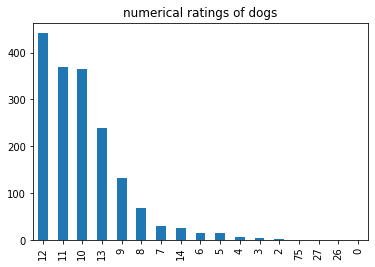

In [127]:
# create bar chart for different ratings dog receive out of 10
twitter_archive_master['rating_numerator'].value_counts().plot(kind='bar', title='numerical ratings of dogs', x='Rating', y='Frequency of Rating');

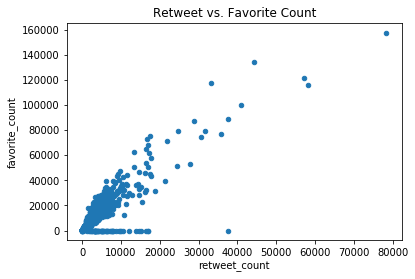

In [128]:
# create a scatter plot to compare retweet vs favorite counts from twitter
twitter_archive_master.plot.scatter('retweet_count', 'favorite_count', title='Retweet vs. Favorite Count', c=None);

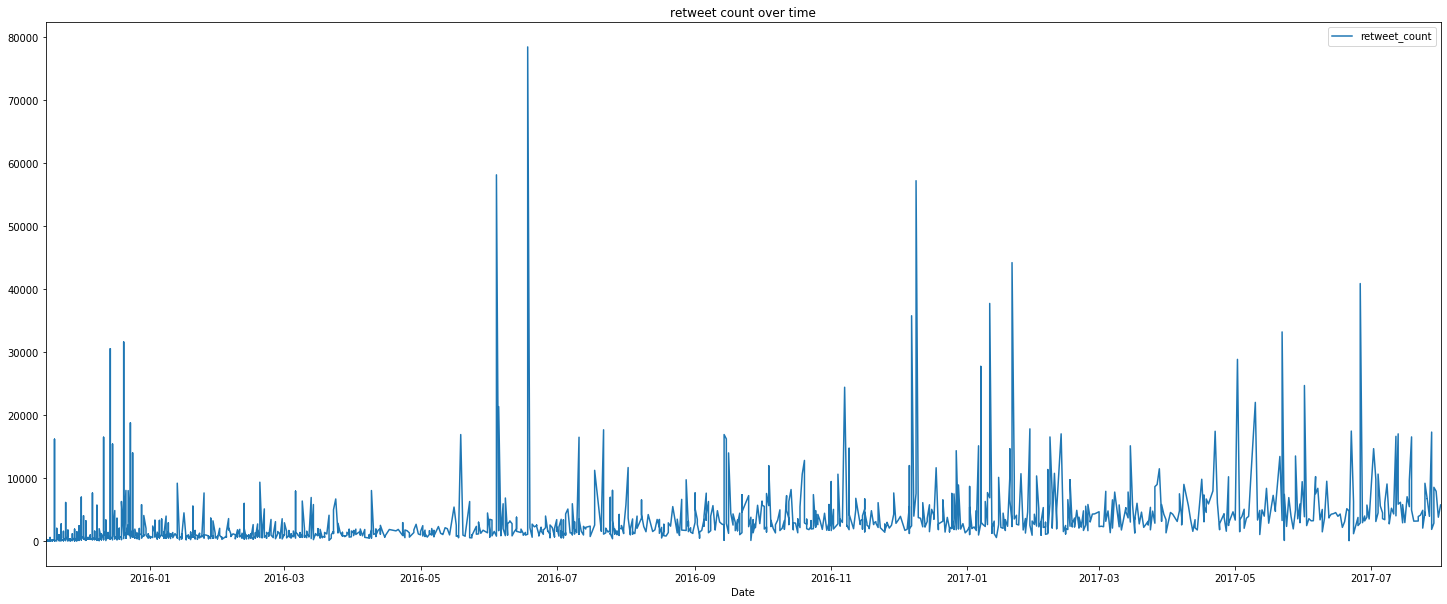

In [130]:
twitter_archive_master.plot('Date', 'retweet_count', figsize = (25,10), title = 'retweet count over time');

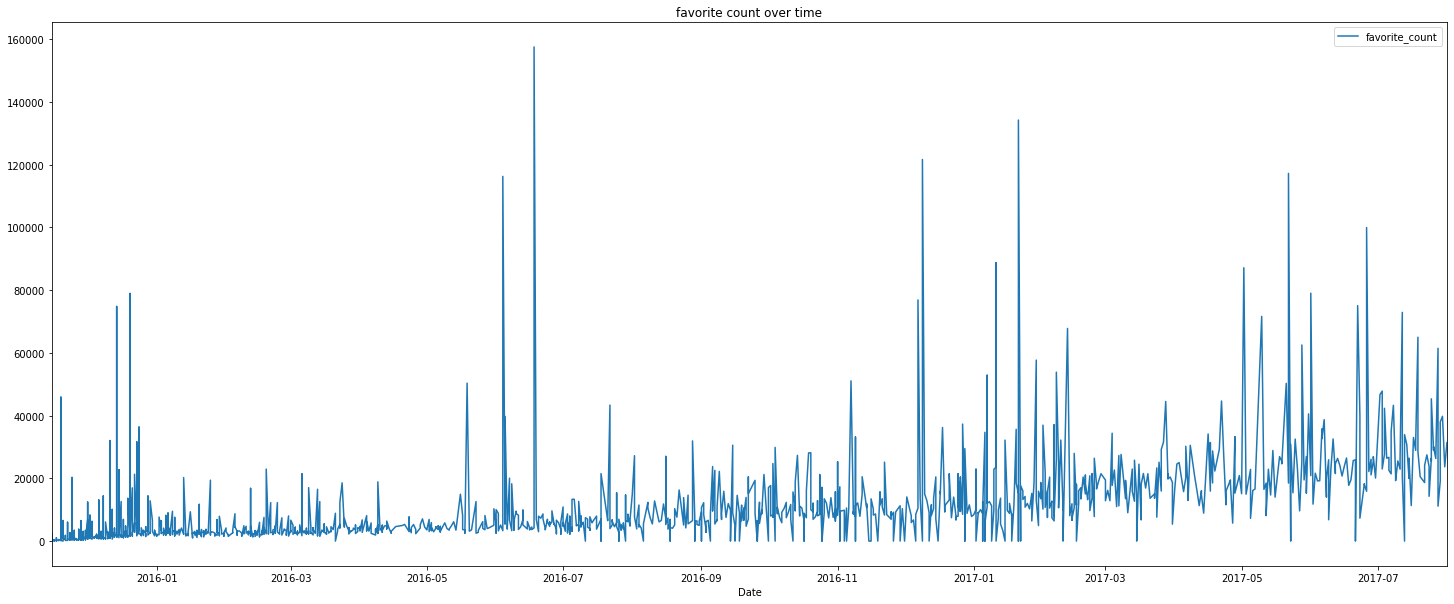

In [131]:
twitter_archive_master.plot('Date', 'favorite_count', figsize = (25,10), title = 'favorite count over time');